In [2]:
%matplotlib inline

import time
import signal
import sys
import numpy as np
from hmmlearn import hmm
import pickle
import RPi.GPIO as GPIO
from ring_buffer import RingBuffer
import matplotlib.pyplot as plt
import pickle
from ultrasonic_sensor import UltrasonicSensor

plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
with open('two_sensors.pkl', 'rb') as f:
    zz = pickle.load(f)
z1, z2 = list(zip(*zz))

(0, 100)

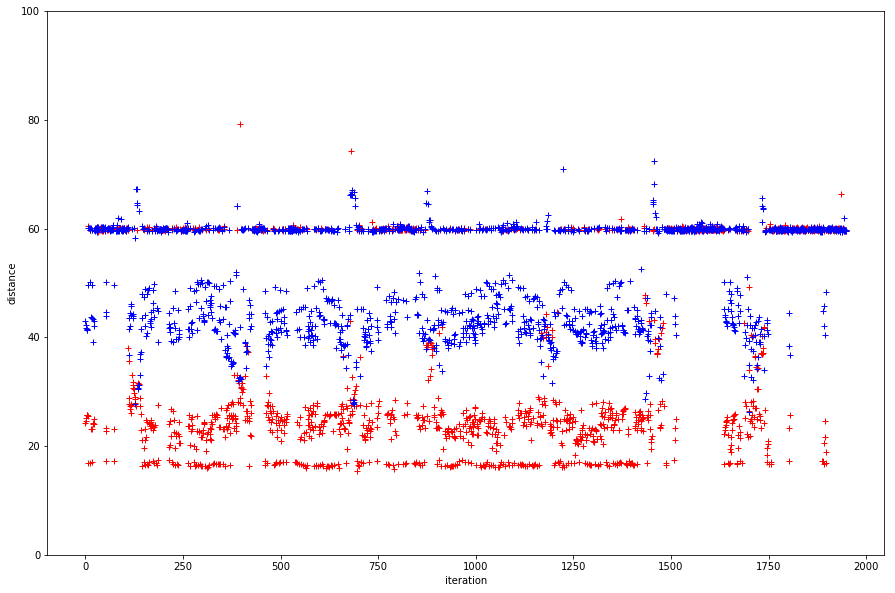

In [39]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.figure()
plt.plot(z1[50:],'r+',label='sensor 1')
plt.plot(z2[50:],'b+',label='sensor 2')

plt.xlabel('iteration')
plt.ylabel('distance')
plt.gca().set_ylim([0, 100])

Let's get some sample values:

In [6]:
model = hmm.GaussianHMM(
    n_components=2,
    covariance_type="diag",
)

In [15]:
samples = np.reshape(z2, (-1, 1))
model.fit(samples)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWa

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [16]:
predictions1 = model.predict(np.reshape(z1, (-1, 1)))
# predictions2 = model.predict(np.reshape(z2, (-1, 1)))
# list(zip(list(predictions1), list(predictions2)))
list(predictions1)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/hmmlearn/base.py:451: RuntimeWarning: divide by zero encountered in log
  n_samples, n_components, np.log(self.startprob_),


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [28]:
enumd = np.ndenumerate(samples)
present = list(
    map(lambda x: (x[0][0], x[1]),
        filter(lambda x: predictions1[x[0][0]] == 1, enumd)
    )
)
enumd = np.ndenumerate(samples)
absent = list(
    map(lambda x: (x[0][0], x[1]),
        filter(lambda x: predictions1[x[0][0]] == 0, enumd)
    )
)

In [29]:
absent

[(0, 60.179961535426266),
 (1, 49.601613965375329),
 (2, 43.099371339876598),
 (3, 42.234993447154011),
 (4, 41.724728331314147),
 (5, 40.890234554157175),
 (6, 676.35769254554452),
 (8, 49.306216163408131),
 (9, 43.867756739872675),
 (10, 41.740906016654662),
 (12, 676.53879334303929),
 (14, 676.48393374913996),
 (15, 59.748127076508169),
 (16, 48.729484854616565),
 (17, 42.972779026312487),
 (18, 676.34397931124352),
 (19, 59.892308221109666),
 (20, 50.67699706056883),
 (22, 50.079172625128919),
 (23, 45.186493604142193),
 (25, 49.872043068521272),
 (26, 43.129971160714192),
 (28, 49.318876067803103),
 (29, 43.840681405802748),
 (30, 676.39215450234735),
 (31, 59.874023949647381),
 (32, 49.719421995844279),
 (33, 43.757335356700061),
 (34, 43.214721649691633),
 (36, 49.910367136725831),
 (37, 44.344613228815795),
 (38, 43.549152494749798),
 (39, 676.45088296259746),
 (40, 59.921145810845154),
 (41, 49.030864888568793),
 (42, 676.43716299791083),
 (43, 676.49940921454311),
 (44, 676.5

(0, 100)

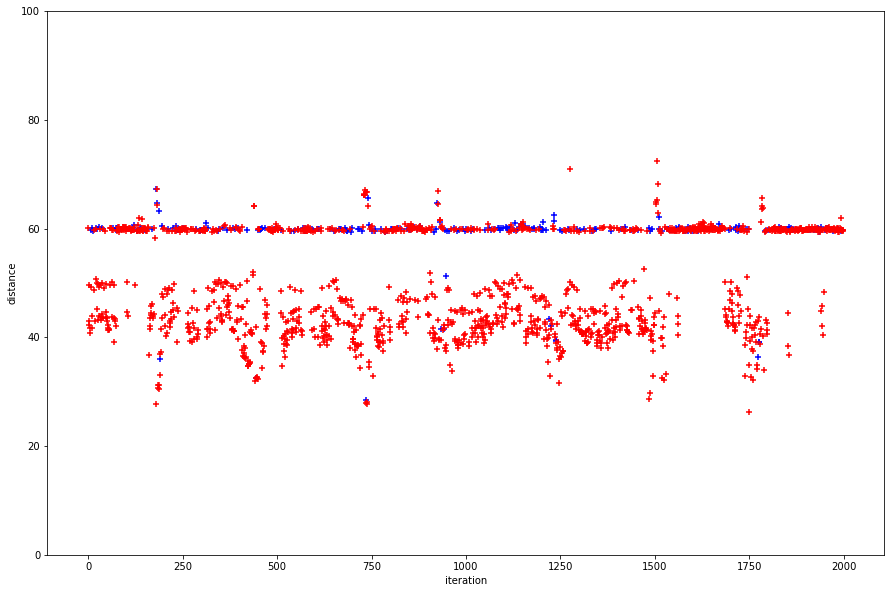

In [38]:
plt.scatter(*zip(*present), c='b', marker='+')
plt.scatter(*zip(*absent), c='r', marker='+')
# plt.plot(z2[50:],'b+',label='sensor 2')

plt.xlabel('iteration')
plt.ylabel('distance')
plt.gca().set_ylim([0, 100])